<h1>自動ログイン<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selenium" data-toc-modified-id="Selenium-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selenium</a></span></li><li><span><a href="#Google-Cloud-Vision-API" data-toc-modified-id="Google-Cloud-Vision-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Google Cloud Vision API</a></span></li><li><span><a href="#main()実行" data-toc-modified-id="main()実行-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>main()実行</a></span></li></ul></div>

# Selenium

In [1]:
from selenium import webdriver
from selenium.webdriver.common.alert import Alert
from IPython.display import Image, display_png # 画像表示用

def main():
    
    # 指定のURLでブラウザを起動
    chrome = webdriver.Chrome('./driver/chromedriver.exe')
    chrome.get('https://')


    # 操作する要素をid属性で指定
    loginBox    = chrome.find_element_by_id('loginId')
    passwordBox = chrome.find_element_by_id('password')
    reloadBtn   = chrome.find_element_by_id('captcha_reload')
    img         = chrome.find_element_by_id('captcha_image')
    tokenBox    = chrome.find_element_by_id('token')
    loginBtn    = chrome.find_element_by_id('loginBtn')

    # 要素を操作
    loginBox.send_keys("id")
    passwordBox.send_keys("password")
    
    
    # 要素のスクリーンショットをバイナリデータとして取得
    png = img.screenshot_as_png

    # open(file, mode) + with で close する
    with open('./img.png', 'wb') as f:
        f.write(png)
    
    # Google Cloud Vision API の利用
    result = request_cloud_vison_api('./img.png')
    # 出力結果の加工
    text = result["responses"][0]["textAnnotations"][0]["description"]
    num = text_to_num(text)
    
    # 結果
    display_png(Image('./img.png'))
    print(num)
    
    # 検索結果を送信
    tokenBox.send_keys(num)
    
    # loginBtn.click()
    
    # アラートのOKをクリック
    # Alert(chrome).accept()
    
    # chrome.close()

# Google Cloud Vision API

In [2]:
import requests
import base64
import json
import re # 正規表現操作のライブラリ

# Cloud Vison API にリクエスト
def request_cloud_vison_api(file_path):
    
    GOOGLE_CLOUD_VISION_API_URL = 'https://vision.googleapis.com/v1/images:annotate?key='
    API_KEY = 'API_KEY'
    URL = GOOGLE_CLOUD_VISION_API_URL + API_KEY
    
    # jsonに変換するため、str型 Base64エンコード画像を準備
    img_base64_str = img_to_base64_str(file_path)

    payload = {'requests': [{
                   'image': {
                        # 画像は以下のいずれかで渡す
                        # base64エンコード文字列、Google Cloud Storage URI、ウェブ URL
                        'content': img_base64_str
                   },
                   'features': [{
                        # 分析内容
                        'type': 'TEXT_DETECTION',
                        'maxResults': 10,
                    }]
               }]
              }
    res = requests.post(URL, data=json.dumps(payload)) # dict型→str型
    return res.json()


# 画像読み込み、str型 Base64エンコード画像で返す
def img_to_base64_str(file_path):
    
    with open(file_path, 'rb') as f:         # ファイルオブジェクト
        img_bytes = f.read()                  # bytes型
        img_b64 = base64.b64encode(img_bytes) # bytes型(Base64エンコード)
        img_b64_str = img_b64.decode('utf-8') # str型
    return img_b64_str


# 文字列から数字のみを取り出す
def text_to_num(text): 
    
    # re.sub(正規表現パターン, 置換後文字列, 置換したい文字列)
    # \D : 10進数でない任意の文字（全角数字等を含む）
    num = re.sub("\\D", "", text)
    return int(num)

# main()実行

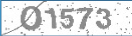

1573


In [3]:
if __name__ == '__main__':
    main()